<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Ko'krak_saratonini_aniqlash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
251,88518501,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
117,864729,M,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,...,18.81,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270,0.3585,0.10650
243,88411702,B,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,...,15.01,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
129,866674,M,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,...,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
439,909410,B,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
393,903516,M,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,...,26.23,28.74,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070
263,889403,M,15.610,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,...,17.91,31.67,115.90,988.6,0.10840,0.18070,0.22600,0.08568,0.2683,0.06829
278,8911800,B,13.590,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,...,15.50,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
273,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,...,10.75,20.88,68.09,355.2,0.14670,0.09370,0.04043,0.05159,0.2841,0.08175


In [4]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [6]:
df.drop(columns='id', inplace = True)

In [9]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [14]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

MLga tayorlash

In [15]:
X = df.drop('diagnosis', axis = 1).values
y = df['diagnosis']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=12)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_predict = knn.predict(X_test)

JACCARD INDEX ORQALI BAHOLASH

In [24]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8958333333333334

Confusion matrix

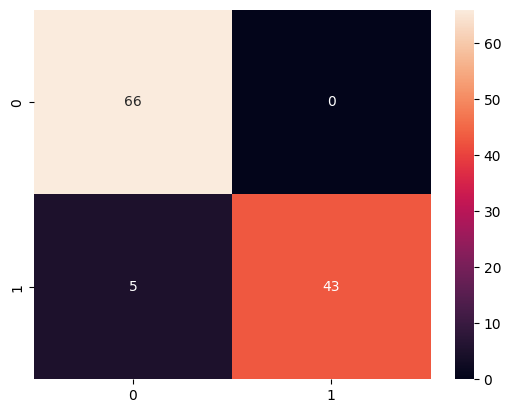

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [26]:
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

Precision, recall, F1

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print(f'{precision=}\n{recall=}\n{f1=}\n{accuracy=}')


precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Crossvalidation yordamida tekshirish

In [33]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X = X, y = y, cv = 5)

## modelni baholash
print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



ENG yaxshi k ni topish

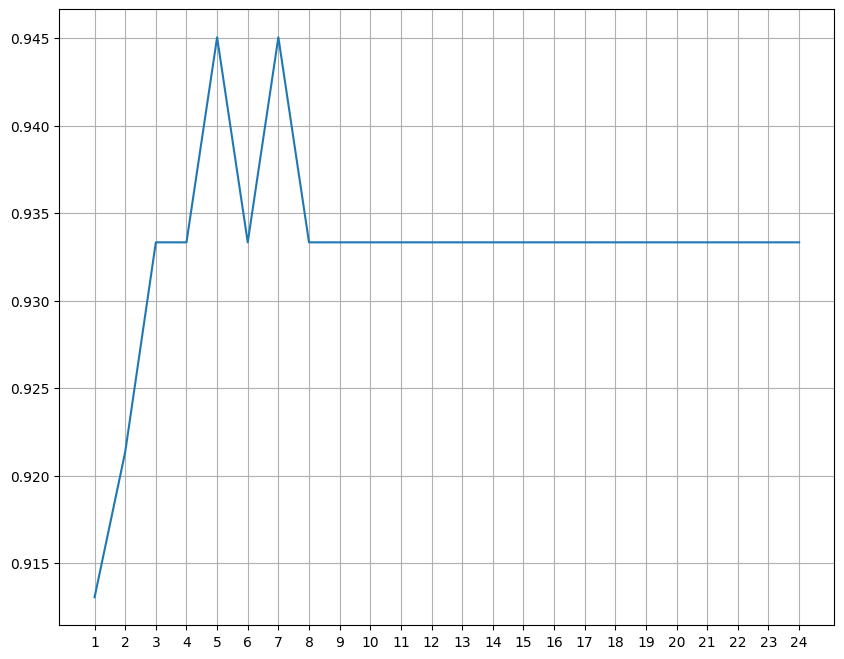

In [35]:
f1 = []

for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predict = knn.predict(X_test)
  f1.append(f1_score(y_test, predict))


plt.figure(figsize =(10, 8))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

GRID search

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid, cv = 5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [39]:
knn_gscv.best_score_



0.968390001552554

In [40]:
knn_gscv.best_params_


{'n_neighbors': 9}